# Bank Personal Loan Sanctioned

In [396]:
import os
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [397]:
#Change the current working directory to the specified path.
#path may always be specified as a string.
#On some platforms, path may also be specified as an open file descriptor.
#If this functionality is unavailable, using it raises an exception
import pandas as pd
os.chdir('/content/gdrive/My Drive/placement/IIBM/stats')
df = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx',sheet_name=1)

**Exploratory Data Analysis**

In [398]:
df.head()
#here zipcode and id is of no use remove that

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [399]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [400]:
df = df.drop(['ID','ZIP Code'],axis=1)

In [401]:
df = df.drop_duplicates()

In [402]:
df.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [403]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4987 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4987 non-null   int64  
 1   Experience          4987 non-null   int64  
 2   Income              4987 non-null   int64  
 3   Family              4987 non-null   int64  
 4   CCAvg               4987 non-null   float64
 5   Education           4987 non-null   int64  
 6   Mortgage            4987 non-null   int64  
 7   Personal Loan       4987 non-null   int64  
 8   Securities Account  4987 non-null   int64  
 9   CD Account          4987 non-null   int64  
 10  Online              4987 non-null   int64  
 11  CreditCard          4987 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 506.5 KB


In [404]:
df = df.dropna()

In [405]:
df.describe()

#Most people who buy a home do so with a mortgage. A mortgage is a necessity if you can’t pay the full cost of a home out of pocket.
#A mortgage is a loan that the borrower uses to purchase or maintain a home or 
# other form of real estate and agrees to pay back over time, typically in a series of regular payments.

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000
mean,45.347704,20.114498,73.824544,2.396631,1.940606,1.879286,56.646080,0.096250,0.104672,0.060557,0.596150,0.294566
std,11.460838,11.464902,46.062728,1.147510,1.748831,0.839667,101.805341,0.294964,0.306161,0.238541,0.490717,0.455893
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.600000,3.000000,101.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [406]:
df_no = df[df['Personal Loan']==0]
#personal loan no

In [407]:
df_no.shape

(4507, 12)

In [408]:
df_yes = df[df['Personal Loan']==1]
#personal loan yes

In [409]:
df_yes.shape

(480, 12)

In [410]:
for i,j in zip(range(len(df.columns)),df.columns):
  print(i,j)

0 Age
1 Experience
2 Income
3 Family
4 CCAvg
5 Education
6 Mortgage
7 Personal Loan
8 Securities Account
9 CD Account
10 Online
11 CreditCard


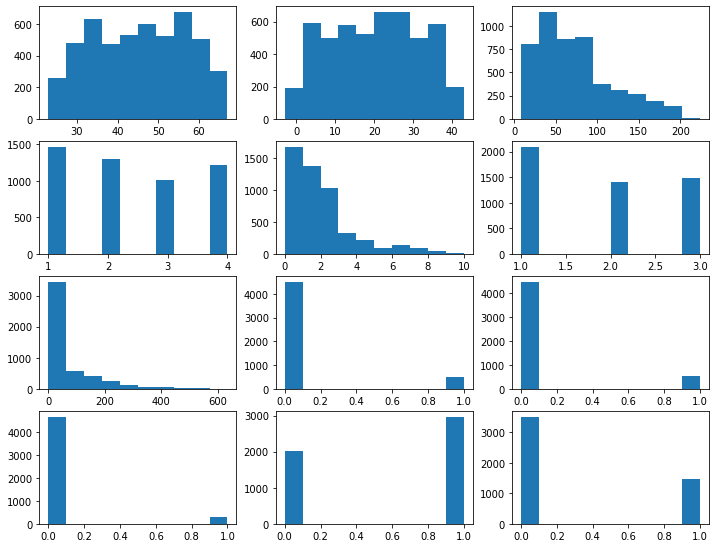

In [411]:
# distribution of variables
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
for i,j in zip(range(len(df.columns)),df.columns):
  plt.subplot(5,3,i+1)
  plt.hist(df[j])

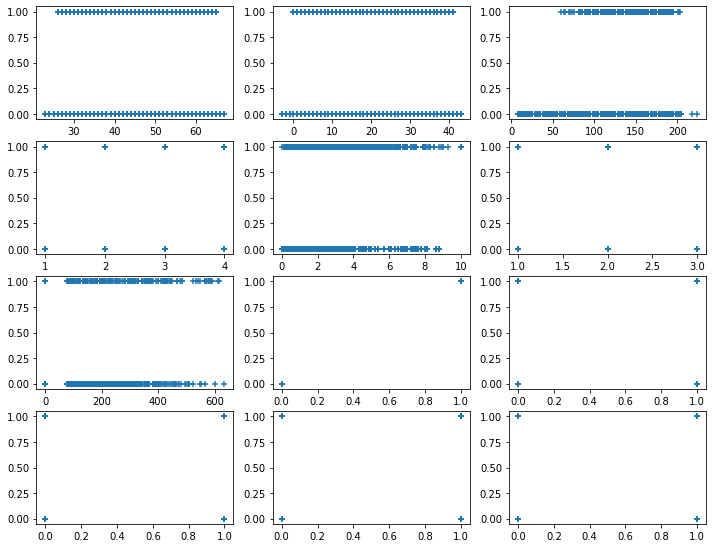

In [412]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
for i,j in zip(range(len(df.columns)),df.columns):
  plt.subplot(5,3,i+1)
  plt.scatter(df[j],df['Personal Loan'],marker='+')

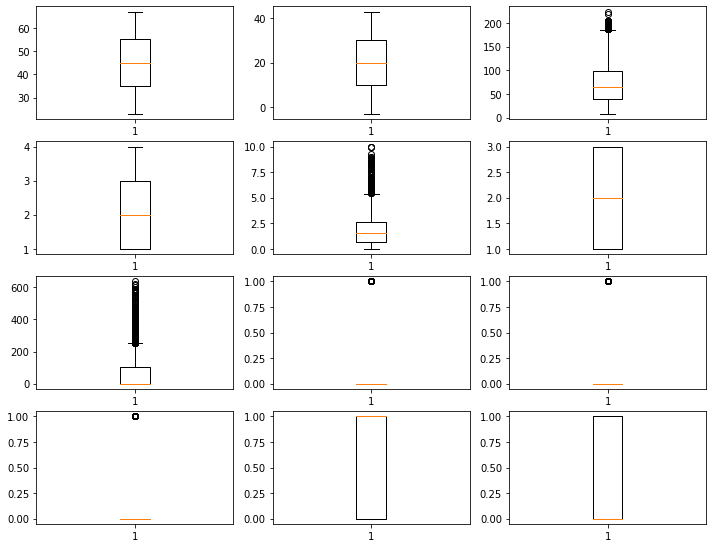

In [413]:
plt.figure(figsize=(12,12))
for i,j in zip(range(len(df.columns)),df.columns):
  plt.subplot(5,3,i+1)
  plt.boxplot(df[j])

#Machine learning Algorithm application on bank loan data set

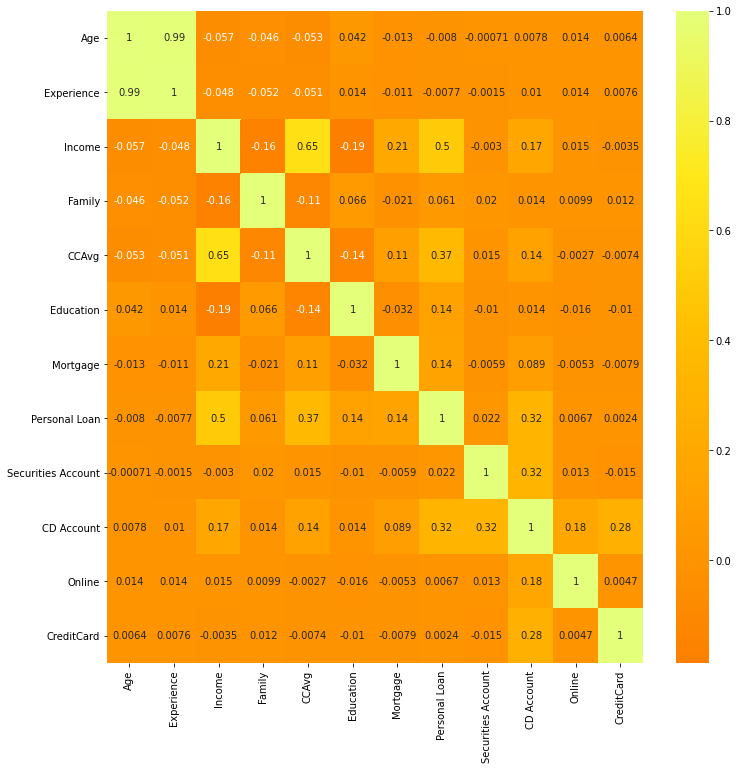

In [414]:
cm = df.corr()
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(cm,cmap='Wistia_r',annot=True)

In [415]:
import statsmodels.api as sm
y = df['Personal Loan']
x = df[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities Account', 'CD Account',
       'Online', 'CreditCard']]

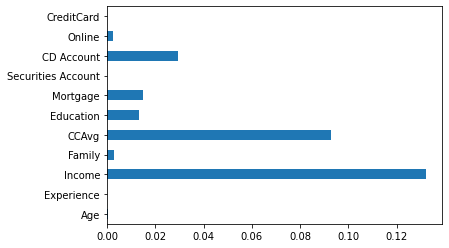

In [416]:
from sklearn.feature_selection import mutual_info_classif
imp = mutual_info_classif(x,y)
fea_imp = pd.Series(imp,x.columns)
fea_imp.plot(kind='barh')
plt.show()

In [417]:
x = df[['Income', 'CCAvg', 'Education','CD Account','Mortgage']]

In [418]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=11)

In [419]:
len(x_train)

3989

In [420]:
len(x_test)

998

In [421]:
from sklearn.linear_model import LogisticRegression
mdl = LogisticRegression()
mdl.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [422]:
mdl.score(x_train,y_train)

0.9448483329155176

In [423]:
mdl.score(x_test,y_test)

0.9498997995991983

In [424]:
y_pred = mdl.predict(x_test)

In [425]:
mdl.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

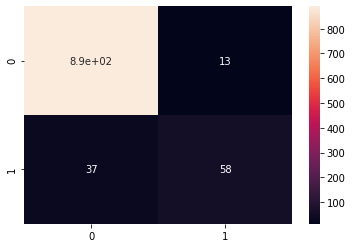

In [426]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test,y_pred) 
sns.heatmap(cm,annot=True,cbar=True)

In [427]:
mdl.classes_

array([0, 1])

In [428]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['class0','class1']))
#Precision:- Accuracy of positive predictions.
#Recall:- Fraction of positives that were correctly identified.
#Support is the number of actual occurrences of the class in the specified dataset.

              precision    recall  f1-score   support

      class0       0.96      0.99      0.97       903
      class1       0.82      0.61      0.70        95

    accuracy                           0.95       998
   macro avg       0.89      0.80      0.84       998
weighted avg       0.95      0.95      0.95       998



# logistic weight

In [429]:
#importing and training the model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='newton-cg', class_weight='balanced')
lr.fit(x_train, y_train)

# Predicting on the test data
pred_test = lr.predict(x_test)

#Calculating and printing the f1 score 
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
f1_test = f1_score(y_test, pred_test)
print('The f1 score for the testing data:', f1_test)

#Ploting the confusion matrix
print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test,pred_test, target_names=['class0','class1']))

The f1 score for the testing data: 0.6006825938566552
[[793 110]
 [  7  88]]
              precision    recall  f1-score   support

      class0       0.99      0.88      0.93       903
      class1       0.44      0.93      0.60        95

    accuracy                           0.88       998
   macro avg       0.72      0.90      0.77       998
weighted avg       0.94      0.88      0.90       998



# stratified

In [430]:
#The folds are made by preserving the percentage of samples for each class.
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=2)
skf.get_n_splits(x, y)

2

In [431]:
for train_index, test_index in skf.split(x, y):
  x_train, x_test = x.iloc[train_index], x.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  mdl = LogisticRegression()
  mdl.fit(x_train,y_train)
  y_pred = mdl.predict(x_test)
  print(mdl.score(x_train,y_train))
  print(metrics.accuracy_score(y_test, y_pred))
  cm = confusion_matrix(y_test,y_pred)
  print(cm)
  print(classification_report(y_test, y_pred, target_names=['class0','class1']))

0.9478539911752908
0.9474739374498797
[[2220   34]
 [  97  143]]
              precision    recall  f1-score   support

      class0       0.96      0.98      0.97      2254
      class1       0.81      0.60      0.69       240

    accuracy                           0.95      2494
   macro avg       0.88      0.79      0.83      2494
weighted avg       0.94      0.95      0.94      2494

0.9474739374498797
0.9450461291616526
[[2219   34]
 [ 103  137]]
              precision    recall  f1-score   support

      class0       0.96      0.98      0.97      2253
      class1       0.80      0.57      0.67       240

    accuracy                           0.95      2493
   macro avg       0.88      0.78      0.82      2493
weighted avg       0.94      0.95      0.94      2493



# Random Forest

In [432]:
y = df['Personal Loan']
x = df[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities Account', 'CD Account',
       'Online', 'CreditCard']]

In [433]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [434]:
from sklearn.ensemble import RandomForestClassifier
rf_mdl = RandomForestClassifier(n_estimators=1000,oob_score=False)
rf_mdl.fit(x_train,y_train)
#Random Forest does not require split sampling method to assess accuracy of the model. 
#It performs internal validation as 2-3rd of available training data is used to grow 
#each tree and the remaining one-third portion of training data always used to calculate out-of bag error to assess model performance.

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [435]:
y_pred = rf_mdl.predict(x_test)

In [436]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.9859719438877755

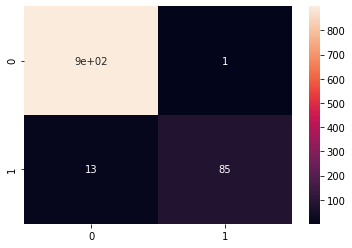

In [437]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test,y_pred) 
sns.heatmap(cm,annot=True,cbar=True)

In [438]:
rf_mdl.classes_

array([0, 1])

In [439]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['class0','class1']))

              precision    recall  f1-score   support

      class0       0.99      1.00      0.99       900
      class1       0.99      0.87      0.92        98

    accuracy                           0.99       998
   macro avg       0.99      0.93      0.96       998
weighted avg       0.99      0.99      0.99       998



In [440]:
feat=[]
impt=[]
for feature,imp in zip(x,rf_mdl.feature_importances_):
  print(feature,imp)
  feat.append(feature)
  impt.append(imp)

  #here Income=0.34, CCAvg=0.15, Education= 0.20, Family=0.11

Age 0.03676373989054684
Experience 0.03605062479927463
Income 0.3461147478414862
Family 0.11823276605610189
CCAvg 0.1593861499323911
Education 0.19527702541119865
Mortgage 0.03433535236599131
Securities Account 0.004726561702455577
CD Account 0.053523663298963076
Online 0.00709772734984215
CreditCard 0.008491641351748555


<BarContainer object of 11 artists>

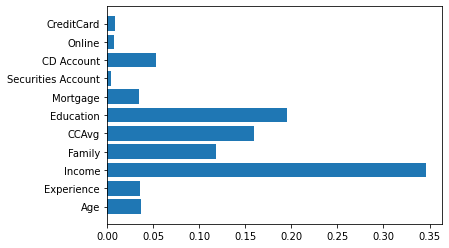

In [441]:
plt.barh(feat,impt)

In [442]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [443]:
y = df['Personal Loan']
x=df[['Income', 'Family', 'CCAvg', 'Education']]

In [444]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [445]:
from sklearn.ensemble import RandomForestClassifier
rf_mdl = RandomForestClassifier(n_estimators=1000,oob_score=False)
rf_mdl.fit(x_train,y_train)
#Random Forest does not require split sampling method to assess accuracy of the model. 
#It performs internal validation as 2-3rd of available training data is used to grow 
#each tree and the remaining one-third portion of training data always used to calculate out-of bag error to assess model performance.

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [446]:
y_pred = rf_mdl.predict(x_test)

In [447]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.9869739478957916

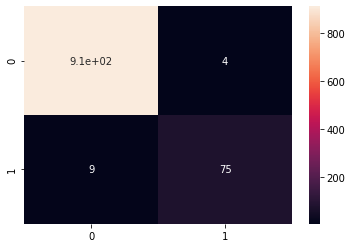

In [448]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test,y_pred) 
sns.heatmap(cm,annot=True,cbar=True)

In [449]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['class0','class1']))

              precision    recall  f1-score   support

      class0       0.99      1.00      0.99       914
      class1       0.95      0.89      0.92        84

    accuracy                           0.99       998
   macro avg       0.97      0.94      0.96       998
weighted avg       0.99      0.99      0.99       998



In [450]:
from sklearn import *

In [451]:
tree_mdl = tree.DecisionTreeClassifier()
tree_mdl.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

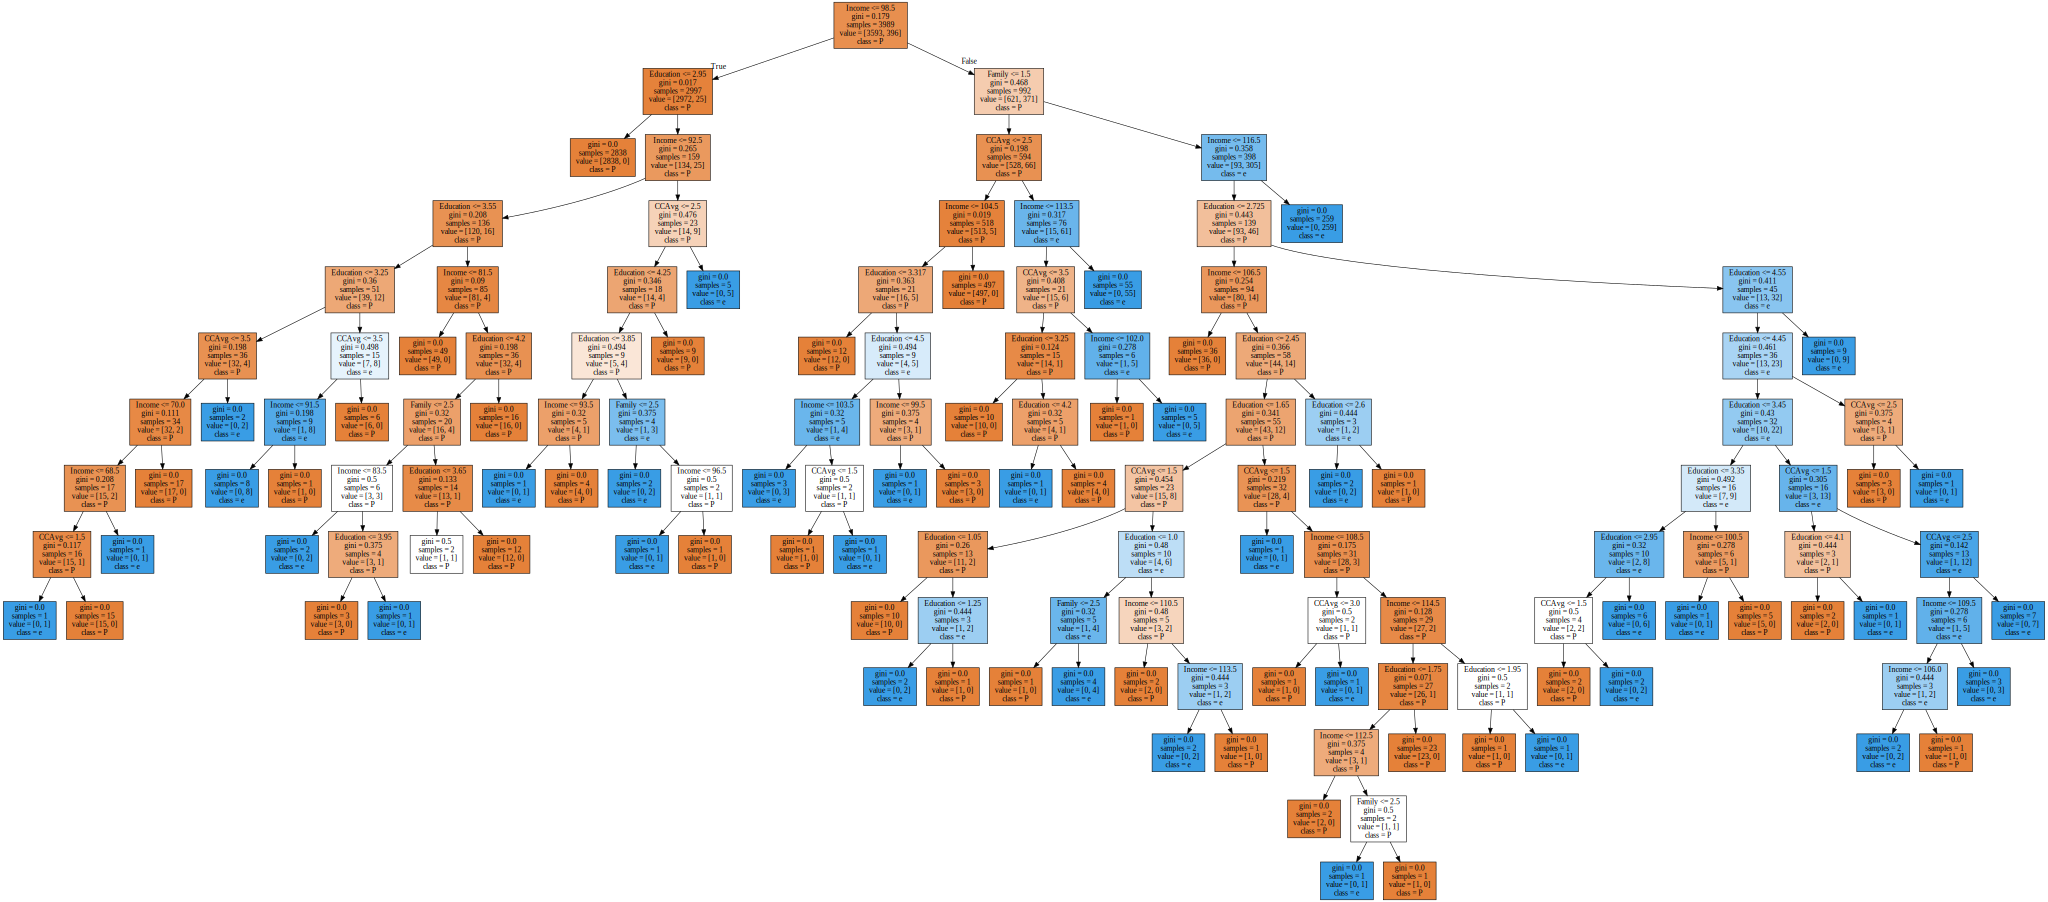

In [452]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(tree_mdl, out_file=None, 
                                feature_names= ['Income', 'CCAvg', 'Education','Family'],  
                                class_names='Personal Loan',
                                filled=True)
# here feature name we put that will shown on tree and also same with class names
# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

# here there are total 889 samples in which 549 are not survived i.e zero and 340 are survived i.e. 1
#549 represent not survived and 340 represent survived
# after that it split into female==True==0 and male==false==1

# Stratified 

In [453]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=2)
skf.get_n_splits(x, y)

2

In [454]:
for train_index, test_index in skf.split(x, y):
  x_train, x_test = x.iloc[train_index], x.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  rf_mdl = RandomForestClassifier(n_estimators=100,oob_score=True)
  rf_mdl.fit(x_train,y_train)
  y_pred = rf_mdl.predict(x_test)
  print(metrics.accuracy_score(y_test, y_pred))
  cm = confusion_matrix(y_test,y_pred)
  print(classification_report(y_test, y_pred, target_names=['class0','class1']))
  print(cm)

0.9843624699278268
              precision    recall  f1-score   support

      class0       0.99      1.00      0.99      2254
      class1       0.97      0.87      0.91       240

    accuracy                           0.98      2494
   macro avg       0.98      0.93      0.95      2494
weighted avg       0.98      0.98      0.98      2494

[[2247    7]
 [  32  208]]
0.9859606899318091
              precision    recall  f1-score   support

      class0       0.99      1.00      0.99      2253
      class1       0.96      0.90      0.92       240

    accuracy                           0.99      2493
   macro avg       0.97      0.95      0.96      2493
weighted avg       0.99      0.99      0.99      2493

[[2243   10]
 [  25  215]]


#K-nearest neighbour

In [455]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import confusion_matrix,accuracy_score

In [456]:
x = df[['Income', 'CCAvg', 'Education','CD Account','Mortgage']]
y = df['Personal Loan']

In [457]:
# spliting the dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)
knn=neighbors.KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [458]:
knn.score(x_train,y_train)

0.9563800451240912

In [459]:
y_pred =knn.predict(x_test)

In [460]:
accuracy_score(y_test,y_pred)

0.9258517034068137

In [461]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['class0','class1']))

              precision    recall  f1-score   support

      class0       0.94      0.98      0.96       914
      class1       0.61      0.32      0.42        84

    accuracy                           0.93       998
   macro avg       0.78      0.65      0.69       998
weighted avg       0.91      0.93      0.92       998



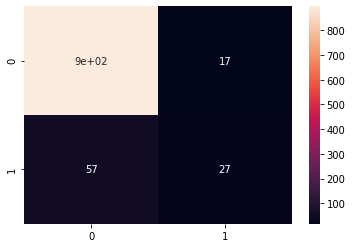

In [462]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test,y_pred) 
sns.heatmap(cm,annot=True,cbar=True)

# SVM

In [463]:
from sklearn.svm import SVC
svm_mdl = svm.SVC(gamma=0.001,C=100) 
svm_mdl.fit(x_train,y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [464]:
svm_mdl.score(x_train,y_train)

0.9714214088744046

In [465]:
y_pred=svm_mdl.predict(x_test)

In [466]:
accuracy_score(y_test,y_pred)

0.9529058116232465

In [467]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['class0','class1']))

              precision    recall  f1-score   support

      class0       0.97      0.98      0.97       914
      class1       0.75      0.67      0.70        84

    accuracy                           0.95       998
   macro avg       0.86      0.82      0.84       998
weighted avg       0.95      0.95      0.95       998



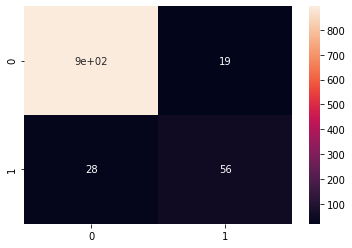

In [468]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test,y_pred) 
sns.heatmap(cm,annot=True,cbar=True)